In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class MnistNet(nn.Module):

    def __init__(self):
        super(MnistNet, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [4]:
net = MnistNet()
print(net)

MnistNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
train = torchvision.datasets.CIFAR10(root='/home/tbxsx/Code/learnMachineLearning/data/cifar',train=True,transform=transform)
test = torchvision.datasets.CIFAR10(root='/home/tbxsx/Code/learnMachineLearning/data/cifar',train=False,transform=transform)




In [7]:
trainloader = torch.utils.data.DataLoader(train, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test, batch_size=4,
                                          shuffle=True, num_workers=2)

In [8]:
iter(trainloader).next()

[
 (0 ,0 ,.,.) = 
  -0.3020 -0.3020 -0.2941  ...  -0.1608 -0.1686 -0.1765
  -0.2784 -0.2706 -0.2706  ...  -0.1686 -0.1765 -0.1843
  -0.2549 -0.2549 -0.2549  ...  -0.1608 -0.1686 -0.1922
            ...             ⋱             ...          
   0.0353  0.2157 -0.1686  ...  -0.1451 -0.1765 -0.2471
   0.0980  0.2235  0.1216  ...  -0.2471 -0.3412 -0.1608
   0.0431  0.1294  0.1529  ...  -0.3490 -0.4510 -0.1608
 
 (0 ,1 ,.,.) = 
   0.0118  0.0118  0.0039  ...   0.1922  0.1843  0.1765
   0.0510  0.0431  0.0353  ...   0.1843  0.1765  0.1608
   0.0745  0.0667  0.0588  ...   0.1922  0.1843  0.1608
            ...             ⋱             ...          
   0.0431  0.1843 -0.1686  ...   0.0902  0.0353 -0.0745
   0.2000  0.3255  0.1922  ...  -0.1216 -0.2000 -0.0039
   0.1765  0.2863  0.3176  ...  -0.2784 -0.2941  0.0039
 
 (0 ,2 ,.,.) = 
   0.0353  0.0353  0.0118  ...   0.3569  0.3647  0.3569
   0.1294  0.0980  0.0588  ...   0.3804  0.3804  0.3490
   0.1922  0.1529  0.1137  ...   0.3804  0.3961  0

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  car  deer plane   cat


In [10]:
class CIFARNet(nn.Module):
    def __init__(self):
        super(CIFARNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [11]:
net = CIFARNet()
net = net.cuda()

/usr/local/lib/python3.5/dist-packages/torch/cuda/__init__.py:116: UserWarning: 
    Found GPU0 GeForce 940M which is of cuda capability 5.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


## Loss and Optimizer

In [12]:
import torch.optim as optim

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0005, momentum=0.7)

In [22]:
import time
t = time.time()
for epoch in range(20):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
#         inputs, labels = Variable(inputs), Variable(labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
print("Total Time: ")
print(time.time()-t)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 0.763
[1,  4000] loss: 0.758
[1,  6000] loss: 0.792
[1,  8000] loss: 0.823
[1, 10000] loss: 0.860
[1, 12000] loss: 0.840
[2,  2000] loss: 0.728
[2,  4000] loss: 0.776
[2,  6000] loss: 0.764
[2,  8000] loss: 0.802
[2, 10000] loss: 0.797
[2, 12000] loss: 0.809
[3,  2000] loss: 0.690
[3,  4000] loss: 0.746
[3,  6000] loss: 0.776
[3,  8000] loss: 0.780
[3, 10000] loss: 0.784
[3, 12000] loss: 0.778
[4,  2000] loss: 0.689
[4,  4000] loss: 0.731
[4,  6000] loss: 0.713
[4,  8000] loss: 0.765
[4, 10000] loss: 0.779
[4, 12000] loss: 0.771
[5,  2000] loss: 0.665
[5,  4000] loss: 0.702
[5,  6000] loss: 0.702
[5,  8000] loss: 0.742
[5, 10000] loss: 0.751
[5, 12000] loss: 0.756
[6,  2000] loss: 0.656
[6,  4000] loss: 0.688
[6,  6000] loss: 0.716
[6,  8000] loss: 0.705
[6, 10000] loss: 0.751
[6, 12000] loss: 0.737
[7,  2000] loss: 0.645
[7,  4000] loss: 0.667
[7,  6000] loss: 0.705
[7,  8000] loss: 0.707
[7, 10000] loss: 0.738
[7, 12000] loss: 0.722
[8,  2000] loss: 0.609
[8,  4000] 

[58,  6000] loss: 0.636
[58,  8000] loss: 0.638
[58, 10000] loss: 0.587
[58, 12000] loss: 0.630
[59,  2000] loss: 0.563
[59,  4000] loss: 0.556
[59,  6000] loss: 0.666
[59,  8000] loss: 0.614
[59, 10000] loss: 0.632
[59, 12000] loss: 0.672
[60,  2000] loss: 0.540
[60,  4000] loss: 0.572
[60,  6000] loss: 0.579
[60,  8000] loss: 0.605
[60, 10000] loss: 0.664
[60, 12000] loss: 0.627
[61,  2000] loss: 0.543
[61,  4000] loss: 0.583
[61,  6000] loss: 0.590
[61,  8000] loss: 0.617
[61, 10000] loss: 0.641
[61, 12000] loss: 0.646
[62,  2000] loss: 0.518
[62,  4000] loss: 0.593
[62,  6000] loss: 0.576
[62,  8000] loss: 0.659
[62, 10000] loss: 0.666
[62, 12000] loss: 0.638
[63,  2000] loss: 0.567
[63,  4000] loss: 0.662
[63,  6000] loss: 0.623
[63,  8000] loss: 0.603
[63, 10000] loss: 0.658
[63, 12000] loss: 0.685
[64,  2000] loss: 0.584
[64,  4000] loss: 0.612
[64,  6000] loss: 0.614
[64,  8000] loss: 0.609
[64, 10000] loss: 0.649
[64, 12000] loss: 0.656
[65,  2000] loss: 0.561
[65,  4000] loss

GroundTruth:   frog   car  deer   car
Predicted:   frog truck  deer truck


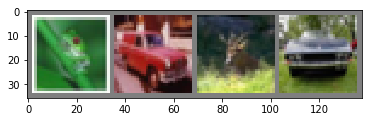

In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(Variable(images.cuda()))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [24]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.cuda().size(0)
    temp = (int)((predicted == labels.cuda()).sum())
    correct += temp
print(correct)
print(total)
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

5593
10000
Accuracy of the network on the 10000 test images: 55 %


In [20]:
images, labels = data
outputs = net(Variable(images.cuda()))
_, predicted = torch.max(outputs.data, 1)

In [21]:
predicted


 5
 9
 3
 4
[torch.cuda.LongTensor of size (4,) (GPU 0)]

In [108]:
labels


 4
 1
 6
 1
[torch.LongTensor of size (4,)]

In [121]:
a = (predicted == labels).sum()

In [123]:
int(a)

3